In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/fraud-detection/synth_composite.csv


## Import Libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

sns.set_theme()
sns.set_style("darkgrid")

## Load dataset

In [3]:
df = pd.read_csv('../input/fraud-detection/synth_composite.csv')

### Show some stats

In [4]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,211,CASH_OUT,184185.755277,160_2696646_0,203108.476051,18922.720773,160_901564_0,1.019994e+06,1.204127e+06,0,0
1,394,CASH_OUT,237093.196009,160_5585569_0,382707.464238,145614.268230,160_1586945_0,5.870893e+05,8.243203e+05,0,0
2,306,CASH_IN,163600.518794,160_4221372_0,3093.431169,0.000000,160_1701821_0,6.534538e+05,4.901219e+05,0,0
3,235,PAYMENT,7625.866018,160_3064357_0,74630.853812,67004.987793,160_1304279_0,1.666019e+01,1.362096e+01,0,0
4,235,PAYMENT,7866.992466,160_5544127_0,74632.326454,66765.333988,160_2370260_0,5.390545e+00,9.820910e+00,0,0
5,493,CASH_OUT,281403.795998,160_6037426_0,42235.923347,0.000000,160_2092767_0,5.880235e+05,8.693219e+05,0,0
6,18,PAYMENT,4355.986182,160_400626_0,56160.034248,51804.048066,160_175474_0,8.496485e+00,1.078249e+01,0,0
7,550,CASH_IN,102079.164541,160_6146482_0,15781.717821,0.000000,160_354507_0,4.064748e+06,3.962757e+06,0,0
8,284,CASH_OUT,144074.648278,160_3889478_0,197270.864524,53196.216246,160_1089660_0,1.097389e+06,1.241346e+06,0,0
9,132,CASH_OUT,142367.900524,160_1163767_0,0.185064,0.000000,160_29365_0,2.424877e+06,2.567106e+06,0,0


In [5]:
df.shape

(6362620, 11)

In [6]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [7]:
df['isFlaggedFraud'].value_counts()

0    6362606
1         14
Name: isFlaggedFraud, dtype: int64

In [8]:
df[df['isFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6354407,741,CASH_OUT,2.00,161_8178_0,-71.00,-73.0,161_8134_0,2.700696e+05,2.702828e+05,1,0
6354408,212,CASH_OUT,362998.52,161_2386_0,363050.52,52.0,161_2374_0,2.159733e+06,2.523959e+06,1,0
6354409,568,CASH_OUT,66187.66,161_6282_0,66125.66,-62.0,161_6251_0,7.177089e+05,7.832872e+05,1,0
6354410,15,CASH_OUT,696771.08,161_168_0,696771.08,0.0,161_167_0,3.688858e+05,1.351356e+06,1,0
6354411,501,CASH_OUT,73332.47,161_5584_0,73285.47,-47.0,161_5556_0,1.253682e+05,1.923281e+05,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,483,CASH_OUT,22982.73,161_5384_0,22981.73,-1.0,161_5356_0,3.279893e+06,3.304007e+06,1,0
6362616,214,CASH_OUT,1368390.50,161_2420_0,1368453.50,63.0,161_2408_0,2.589394e+05,1.624944e+06,1,0
6362617,679,CASH_OUT,3150440.28,161_7476_0,3150454.28,14.0,161_7437_0,6.372507e+03,3.157667e+06,1,0
6362618,482,CASH_OUT,75655.33,161_5366_0,75647.33,-8.0,161_5338_0,8.529471e+05,9.285452e+05,1,0


In [9]:
df[df['isFraud']==1].index[-1] - df[df['isFraud']==1].index[0]

8212

--> The last rows in the df are labeled as fraud

In [10]:
df_10 = df.sample(frac=0.1)

In [11]:
df_10['isFraud'].value_counts()

0    635442
1       820
Name: isFraud, dtype: int64

In [12]:
df_10.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1006707,201,CASH_IN,1722.006152,160_2394725_0,26378.959266,24656.953113,160_490347_0,2.587370e+05,2.567854e+05,0,0
4718626,253,CASH_OUT,340927.247981,160_3327061_0,19167.545421,0.000000,160_1419030_0,3.890267e+02,5.214401e+05,0,0
5736454,209,CASH_OUT,44220.257787,160_2629034_0,13290.242657,0.000000,160_1069177_0,1.118046e+06,1.162319e+06,0,0
3725647,264,PAYMENT,2262.526287,160_3601396_0,153605.345905,151342.819618,160_1538449_0,1.475819e+01,1.277277e+01,0,0
3944516,132,PAYMENT,7470.535759,160_2055500_0,1.042629,0.000000,160_874246_0,3.646751e+00,6.474714e+00,0,0


In [13]:
df_10['type'].value_counts()

CASH_OUT    224158
PAYMENT     214959
CASH_IN     139460
TRANSFER     53538
DEBIT         4147
Name: type, dtype: int64

In [14]:
df_10['type'].value_counts().index

Index(['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT'], dtype='object')

Text(0.5, 1.0, 'Type of transaction')

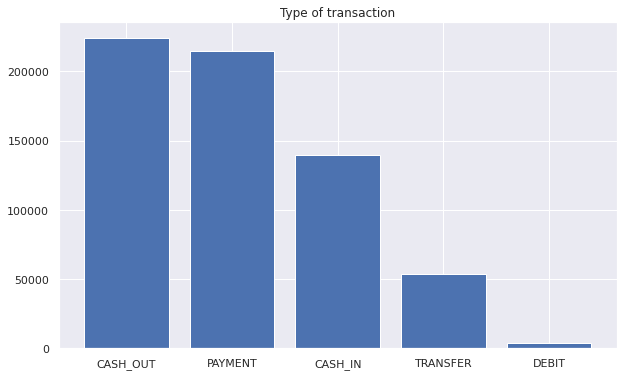

In [15]:
fig = plt.figure(figsize=(10,6))
x = df_10['type'].value_counts().index
y = df_10['type'].value_counts()
plt.bar(x,y)
plt.title('Type of transaction')

In [16]:
df_10.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [17]:
df_10.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [18]:
df_10['nameOrig'].value_counts()

160_3618328_0    2
160_4814797_0    2
160_349343_0     2
160_3815546_0    2
160_1091137_0    2
                ..
160_1335388_0    1
160_2608843_0    1
160_5865084_0    1
160_6219866_0    1
160_3329508_0    1
Name: nameOrig, Length: 636180, dtype: int64

### LabelEncode object typed columns to get numeric data for them

In [19]:
le = LabelEncoder()
df_10_le = df_10.copy()

for i_col in df_10_le.columns:
    if df_10_le[i_col].dtype == "object":
        labels = df_10_le[i_col].astype(str).values
        le.fit(labels)
        df_10_le[i_col] = le.transform(df_10_le[i_col])

In [20]:
df_10_le.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1006707,201,0,1722.006152,154543,26378.959266,24656.953113,338065,2.587370e+05,2.567854e+05,0,0
4718626,253,1,340927.247981,258817,19167.545421,0.000000,82663,3.890267e+02,5.214401e+05,0,0
5736454,209,1,44220.257787,180791,13290.242657,0.000000,14296,1.118046e+06,1.162319e+06,0,0
3725647,264,3,2262.526287,289462,153605.345905,151342.819618,104517,1.475819e+01,1.277277e+01,0,0
3944516,132,3,7470.535759,116872,1.042629,0.000000,429413,3.646751e+00,6.474714e+00,0,0


## Import isolation forest

In [21]:
from sklearn.ensemble import IsolationForest

In [22]:
%%time
model = IsolationForest(contamination=0.01, n_estimators=1000)
model.fit(df_10_le)

CPU times: user 3min 12s, sys: 24.6 s, total: 3min 37s
Wall time: 3min 37s


IsolationForest(contamination=0.01, n_estimators=1000)

### Predict Outliers for current dataset

In [23]:
df_10.reset_index(inplace=True)

In [24]:
df_10['iForest'] = pd.Series(model.predict(df_10_le))
df_10['iForest'].value_counts()

 1    629899
-1      6363
Name: iForest, dtype: int64

In [25]:
df_10[df_10['isFraud']==1]

,index,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,iForest
1222,6357056,148,CASH_OUT,3733110.07,161_1663_0,3733169.07,59.0,161_1652_0,454628.584098,4.189711e+06,1,0,1
1254,6361742,261,TRANSFER,1685697.11,161_7475_0,1685643.11,-54.0,161_7436_0,534.097024,4.989733e+03,1,0,1
2774,6361040,307,TRANSFER,134854.82,161_6083_0,134817.82,-37.0,161_6054_0,1235.181878,5.306814e+03,1,0,1
5484,6356093,516,CASH_OUT,10000004.00,161_5740_0,9999981.00,-23.0,161_5712_0,193419.520176,1.019601e+07,1,0,-1
5486,6360449,331,TRANSFER,417224.89,161_4903_0,417180.89,-44.0,161_4875_0,941.277863,2.906349e+03,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
632284,6355367,663,CASH_OUT,28309.97,161_6124_0,28257.97,-52.0,161_6095_0,754.005508,2.503232e+04,1,0,1
632450,6356849,726,CASH_OUT,561450.32,161_8006_0,561517.32,67.0,161_7964_0,121622.352745,6.875408e+05,1,0,1
632725,6360074,686,TRANSFER,1530.84,161_4155_0,1575.84,45.0,161_4132_0,712.405612,4.973654e+03,1,0,1
634349,6359733,212,TRANSFER,1810052.85,161_3477_0,1810030.85,-22.0,161_3457_0,4641.349817,2.495399e+03,1,0,1


### Portion of labeled Frauds which is detected as Fraud and vice versa

In [26]:
frauds_detected = df_10['iForest'][df_10['isFraud']==1].value_counts()


In [27]:
part_detected_frauds = frauds_detected[-1] / frauds_detected[1]
print(f"{part_detected_frauds*100:.3g} % of frauds have been detected (True positive), so {(1-part_detected_frauds)*100:.3g} % have not been detected (False negative)")

22 % of frauds have been detected (True positive), so 78 % have not been detected (False negative)


In [28]:
part_frauds_in_frauDetected = df_10['isFraud'][df_10['iForest']==-1].value_counts(normalize=True)
print(f"{part_frauds_in_frauDetected[0]*100:.3g} % of the detected frauds are no outliers (False positive), and {part_frauds_in_frauDetected[1]*100:.3g} % of detected outliers are real outliers (True negative)")

97.7 % of the detected frauds are no outliers (False positive), and 2.33 % of detected outliers are real outliers (True negative)


In [29]:
part_frauds = df_10['isFraud'].value_counts(normalize=True)
part_frauds

0    0.998711
1    0.001289
Name: isFraud, dtype: float64

In [30]:
print(f"The part of frauds in the original dataset has been {part_frauds[1]*100:.3g} %")

The part of frauds in the original dataset has been 0.129 %


### Select another contamination as outlier part and run model again

In [31]:
%%time
model = IsolationForest(contamination=0.0014, n_estimators=1000)
model.fit(df_10_le)

CPU times: user 3min 16s, sys: 26.7 s, total: 3min 42s
Wall time: 3min 42s


IsolationForest(contamination=0.0014, n_estimators=1000)

In [32]:
df_10['iForest_new_contam'] = pd.Series(model.predict(df_10_le))
df_10['iForest_new_contam'].value_counts()

 1    635371
-1       891
Name: iForest_new_contam, dtype: int64

In [33]:
frauds_detected = df_10['iForest_new_contam'][df_10['isFraud']==1].value_counts()
part_detected_frauds = frauds_detected[-1] / frauds_detected[1]
print(f"{part_detected_frauds*100:.3g} % of frauds have been detected (True positive), so {(1-part_detected_frauds)*100:.3g} % have not been detected (False negative)")

3.27 % of frauds have been detected (True positive), so 96.7 % have not been detected (False negative)


In [34]:
part_frauds_in_frauDetected = df_10['isFraud'][df_10['iForest']==-1].value_counts(normalize=True)
print(f"{part_frauds_in_frauDetected[0]*100:.3g} % of the detected frauds are no outliers (False positive), and {part_frauds_in_frauDetected[1]*100:.3g} % of detected outliers are real outliers (True negative)")

97.7 % of the detected frauds are no outliers (False positive), and 2.33 % of detected outliers are real outliers (True negative)


### Delete the labeled Fraud column from dataset